In [39]:
!py -m pip install scipy

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind,shapiro, stats

import warnings
warnings.filterwarnings("ignore")

# Background 
A company just got datas from Airbnb branch in Thailand. The datas is the listing room in Bangkok for the last two month, and has been asked to perform a visualization and insights. The result will help users to make a strategy for future plan. 




## Problem 
Based on datas there were three clasiffication room: 
1. Entire place 
2. Privates room 
3. Shared rooms 

Based on the classification the management has decided to analyze the character for each of the rooms such as the most reserved place for each place, the price, the average reviews for each classification. The derived information could help client to maximize the marketing expense, increasing quality information on the Airbnb interfance, and boosting untouch listing rooms.

As data analyst, the problem that want to solved:
1. What are the characteristic for each rooms based on:
   - price
   - geographical
   - host id 
   - minimum stay and avalaibility



In [41]:
df = pd.read_csv('Airbnb Listings Bangkok.csv')
display(df.head(4),df.tail(2))

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.76,100.54,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.67,100.62,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75,100.62,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.79,100.57,Private room,1286,7,2,2022-04-01,0.03,1,323,1


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.75,100.54,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.75,100.54,Private room,1214,1,0,NaN,NaN,14,365,0


Data Explanation:
1. id Airbnb’s unique identifier for the listing.

2. name: Name of the listing.

3. host_id: Airbnb’s unique identifier for the host/user.

4. host_name: Name of the host (usually just the first name).

5. neighborhood: The neighborhood, geocoded using latitude and longitude against neighborhoods defined by open/public digital shapefiles.

6. latitude: Latitude of the listing, using the World Geodetic System (WGS84).

7. longitude: Longitude of the listing, using the World Geodetic System (WGS84).

8. room_type Categories: Entire home/apt, Private room, Shared room, Hotel.

   1. Entire place: Best if you’re seeking a home away from home. You’ll have the whole space to yourself, usually including:
        - A bedroom
        - A bathroom
        - A kitchen
        - A separate, dedicated entrance
        Hosts should note in the description if they will be on the property (e.g., “Host occupies the first floor of the home”) and provide further details

   2.  Private room: Ideal if you prefer some privacy but still value a local connection. You’ll have a private room for sleeping, but may share some spaces          (kitchen, living room, bathroom, etc.) with others. You may need to walk through spaces occupied by the host or other guests to access your room.

   3.  Shared room: Suitable if you don’t mind sharing a space with others. You’ll sleep in a space shared with other people and share the entire area.Popular among budget-friendly travelers and those looking to meet new people.

9.  price: Daily price in local currency (may display “$” even if not USD).

10. minimum_nights: Minimum number of nights required for booking (calendar rules may differ).

11. number_of_reviews: Total number of reviews for the listing.

12. last_review: Date of the most recent review.

13. calculated_host_listings_count: Number of listings the host has in the current scrape within the same city/region.

14. availability_365: Number of days the listing is available in the next 365 days (note: it may be unavailable because of bookings or host blocking).

15. number_of_reviews_ltm: Number of reviews the listing has received in the last 12 months.

 ## Data Understanding and Cleaning 
Before analyzing the data, we need to understand the dataset first. by having a depth understanding we can also 
find anomalies that could abrupt the process of analyzing the data, every anomalies will be followed 
by logical justification.

In [42]:
print(f'Number of rows and columns in the dataset {df.shape}')
df.info()

Number of rows and columns in the dataset (15854, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 n

In [43]:
# Change datatype for last review columns into datetime 
df['last_review'] = pd.to_datetime(df['last_review'],errors='coerce')

In [44]:
print(f'Descriptive statistic to appliable columns')
df_desc = df[['price','minimum_nights','number_of_reviews','calculated_host_listings_count','number_of_reviews_ltm']].describe()
pd.set_option('display.float_format', '{:,.2f}'.format)
display(df_desc)

Descriptive statistic to appliable columns


,price,minimum_nights,number_of_reviews,calculated_host_listings_count,number_of_reviews_ltm
count,"15,854.00","15,854.00","15,854.00","15,854.00","15,854.00"
mean,"3,217.70",15.29,16.65,13.89,3.48
std,"24,972.12",50.82,40.61,30.27,8.92
min,0.00,1.00,0.00,1.00,0.00
25%,900.00,1.00,0.00,1.00,0.00
50%,"1,429.00",1.00,2.00,4.00,0.00
75%,"2,429.00",7.00,13.00,13.00,3.00
max,"1,100,000.00","1,125.00","1,224.00",228.00,325.00


In [45]:
# Showing the data uniqueness for every columns 
pd.set_option('display.max_columns',None)
listitem =[]
for col in df.columns :
    listitem.append([col,df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns= ['Columns Name', 'Number of Unique', 'Unique Sample'], data = listitem)
tabel1Desc

,Columns Name,Number of Unique,Unique Sample
0,Unnamed: 0,15854,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]"
1,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254, 62217, 1791481, 66046, 105042, 1793000, 960858, 113744, 965722, 1808600, 118118, 1816517, 969792, 121410, 145343, 973830, 156583, 1823321, 159854, 976690, 978531, 166267, 169285, 978969, 1842066, 169514, 1849029, 1862089, 985743, 988373, 172332, 1016487, 1862331, 1862377, 185364, 1887544, 1888303, 1019241, 241416, 1026451, 1028469, 1028486, 1035589, 1035640, 1897982, 296960, 1898332, 1041976, 313459, 1052180, 1926489, 320014, 1933894, 1057173, 1060320, 384924, 1067748, 1077493, 1943048, 385130, 385278, 385979, 390611, 1947314, 1079039, 1086843, 393066, 397449, 405662, 1088343, 1094136, 1961981, 407381, 1975849, 1133843, 413824, 428360, 428421, 428907, 428950, 430691, 430703, 430706, 432004, 439051, 1138679, ...]"
2,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint, NEw Pro!! Bungalow Bkk Centre, Condo with Chaopraya River View, 1 chic bedroom apartment in BKK, Batcave, Pool view, near Chatuchak, Standard Room Decor do Hostel, Sathorn Terrace Apartment(61), 2BR apt in a cozy neighborhood, Comfy bedroom near River pier & BTS Taksin., budget hotel bangkok near subway, Deluxe Condo, Nana, Pool/GYM/Sauna, Luxury@swimpool/FreeWiFi/nearJJMkt, Nice and Quiet condo near BTS Onnut, 24Flr- 1br Apt near JJ, MRT, BTS, Central Bangkok 3 Bedroom Apartment, The Duplex - Asoke- Luxury 92sqm, New, Stylish & Luxury Studio Condo, River View - Ivy Condo (1 Bedroom), Siamese Gioia on Sukhumvit 31, Contemporary Modern Duplex-Thong Lo, Pan Dao Condo 5 min from BTS On Nut, 1 BR condominium center BKK +NETFLIX+55SQM, 1 penthouse in central Bangkok, MetroPoint Suite Room, Near Airport, Boutique Rooms Near Bangkok Airport, BangLuang House1 @ Bangkok Thailand, Studio near Chula University/Silom walk to MRT/BTS, กรองทองแมนชั่น (ลาดพร้าว 81), Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7, Beautiful 1 BR apartment @BTS Ari, Urban Oasis in the heart of Bangkok, 1Bed apt. near Chula University/Silom, Stay at the ROARING RATCHADA!, 60 m2 apartment in Thong Lor, Bangkok, ICONSIAM River view on 49th floor, 2br apt in Sukhumvit Asoke near BTS, Self catering cozy1-bed near BTS, ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀, Room with city view of BKK, BangLuang House 2@ Bangkok Thailand, Tranquility found in busy Bangkok near new skytran, Private room in Bangkok, ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪, ☞Downtown Central Studio-Bangkok MRT, Beautiful Wood Bangkok Resort House, ""Serviced 2 Bed Scenic SkyVillas"", Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok, Chic two bedroom for Monthly rental, Sukhumvit52 near SkyTrain to BkkCBD, ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡, One Bedroom Suite- WIFI- SATHORN, STUDIO RM2 - WIFI- SATHORN, Quiet Double Bed Apartment, Quiet Double Bed Apartment, Suvarnabhumi free transfer, Luxury&Comfy wthWifi walk-distance to Subwy-Malls, Apr. for rent full fur 1 bedroom, monthly, Long-stay special rate spacious entire floor Siam, One Bed Room at Sukumvit 50 Bangkok, City View, relaxed theme & delicious food around, Ideo Blucove Sukhumvit Bangkok, 2-BR condo near BTS on Sukhumvit Rd, NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airport., IdeoMix, Sukhumvit RD, close to BTS, Mix Dorm Decor do Hostel, Oasis in the heart of Bangkok, 5 mins by car from Chong Nonsi BTS Station, Inn Saladaeng - Superior hotel ro

From the table above: 
1. The dataset has 19 columns and 15.854 rows
2. Some columns have missing values `name`,`host_name`,`last_reviews`,`reviews_per_month`.
3. Kolom `name` adalah nama dari bangunannya nama ini akan diganti dengan No Name + "host id".
4. Columns `host_name` only has 1 rows that are missing, will be replaced by "No Name"
5. Columns `last_review` and `reviews_per_month` have correlation when one of the columns is N/A the othes also N/A
   

## Missing Value 

In [46]:
# Missing value percentage
df.isna().sum()/df.shape[0]*100

Unnamed: 0                        0.00
id                                0.00
name                              0.05
host_id                           0.00
host_name                         0.01
neighbourhood                     0.00
latitude                          0.00
longitude                         0.00
room_type                         0.00
price                             0.00
minimum_nights                    0.00
number_of_reviews                 0.00
last_review                      36.52
reviews_per_month                36.52
calculated_host_listings_count    0.00
availability_365                  0.00
number_of_reviews_ltm             0.00
dtype: float64

<Axes: >

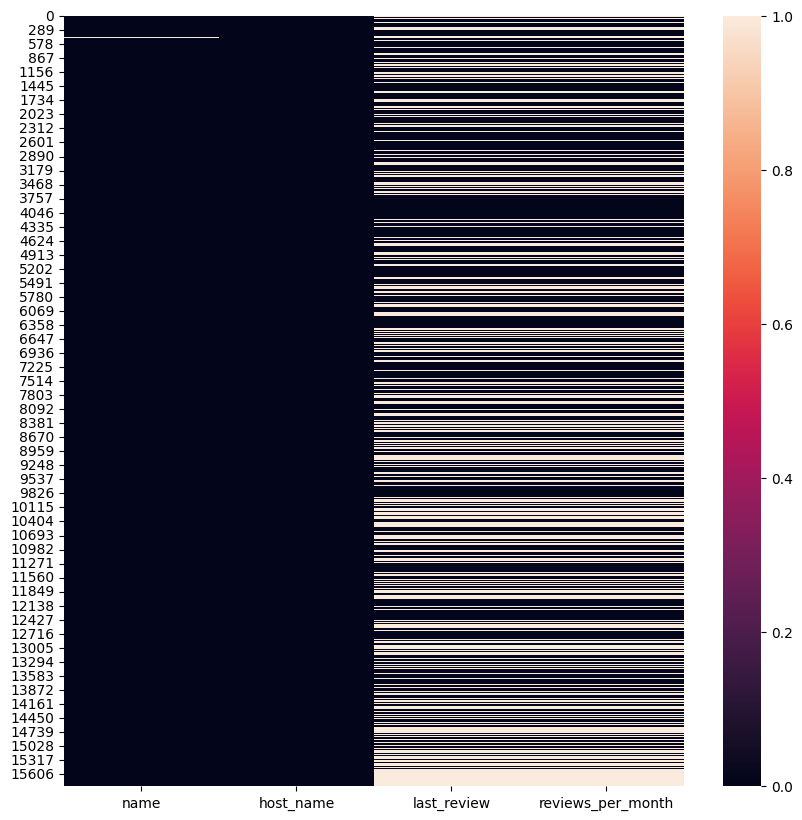

In [47]:
# Distribution of Missing value in the dataset 
plt.figure(figsize=(10,10))
sns.heatmap(df[['name', 'host_name', 'last_review','reviews_per_month']].isna())

Summary of the Missing Value 
1. `name` and `host_name`columns have really small propotion of missing value. 
2. Columns `last_review` and `reviews_per_month` have really huge proportion of missing value above 25%,
3. Columns `last_review` and `reviews_per_month` have correlation when one of the columns is N/A the othes also N/A

Apporach regarding missing Value 
* First, one of the easiest approach could be eraase the rows for each missing value. But this method is not recommend if the missing value is above 10% from the total population. `name` and `host_name` could be done by using this approach, but it will be the last option.
* To fill missing data that has more than 10%, there are several methods could be used. The best approach is to fill the missing data with actual value or as close as possible to the original value. In this case, to fill the missing value I will try to find the correlation between the columns, and by using domain knowledge and statistic approach. If there are still a columns cannot be filled I will use the most logical approach like using mean or median. Deleting rows or columns will be the last option.

We have seen the summary above, starting below we will start to handle all of the missing or anomalies datas:



   

### Missing Value: Last Reviews and Number of Reviews 


In [48]:
# last review and reviews per month have same missing value
df1 = df['last_review'].isna().value_counts()
df2 =df['reviews_per_month'].isna().value_counts()
display(df1,df2)


last_review
False    10064
True      5790
Name: count, dtype: int64

reviews_per_month
False    10064
True      5790
Name: count, dtype: int64

In [49]:
df3 = (df['last_review'].isna() & df['reviews_per_month'].isna()).sum()
df4 = df.loc[df['last_review'].isna() & df['reviews_per_month'].isna()].head(5)
print(f'''There are correlation between two columns, every N/a in last review always follows by N/a in reviews per month, 
    number of missing columns are: {df3}''')
display(df4)

There are correlation between two columns, every N/a in last review always follows by N/a in reviews per month, 
    number of missing columns are: 5790


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.67,100.62,Private room,1316,1,0,NaT,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75,100.62,Private room,800,60,0,NaT,NaN,1,365,0
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.77,100.63,Private room,1905,1,0,NaT,NaN,3,365,0
7,7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.83,100.57,Entire home/apt,1461,1,0,NaT,NaN,1,365,0
14,14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.72,100.57,Entire home/apt,1400,30,0,NaT,NaN,1,365,0


Based on the columns above both last_review and reviews_per_month have correlation and number of missing value, 5790 rows. We will fill the rows simultaneously

In [50]:
#first check the uniqness of the missing value for Last Reviews and Number of Reviews 
pd.set_option('display.max_columns',None)
listitem =[]
for col in df4.columns :
    listitem.append([col,df4[col].nunique(), df4[col].unique()])
tabel1Desc = pd.DataFrame(columns= ['Columns Name', 'Number of Unique', 'Unique Sample'], data = listitem)
tabel1Desc

,Columns Name,Number of Unique,Unique Sample
0,Unnamed: 0,5,"[1, 2, 4, 7, 14]"
1,id,5,"[27979, 28745, 941865, 1738669, 959254]"
2,name,5,"[Easy going landlord,easy place, modern-style apartment in Bangkok, Suite Room 3 at MetroPoint, 1 chic bedroom apartment in BKK, Deluxe Condo, Nana, Pool/GYM/Sauna]"
3,host_id,5,"[120541, 123784, 610315, 7045870, 5153476]"
4,host_name,5,"[Emy, Familyroom, Kasem, Jiraporn, Natcha]"
5,neighbourhood,4,"[Bang Na, Bang Kapi, Chatu Chak, Khlong Toei]"
6,latitude,5,"[13.66818, 13.75232, 13.76872, 13.82925, 13.71516]"
7,longitude,5,"[100.61674, 100.62402, 100.63338, 100.56737, 100.56806]"
8,room_type,2,"[Private room, Entire home/apt]"
9,price,5,"[1316, 800, 1905, 1461, 1400]"


Based on the table above there are several traits in the dataframe filtered by the missing value in last review and reviews per month:
1. `Number_of_reviews` columns only has 1 unique data, which is "0"
2. `number_of_reviews_ltm` columns only has 1 unique data, which is "0"

From this reasons we decided to fill up the missing value: 
1.  Missing value in `last_review` will be filled by using a dummy date ('1970-01-01'), this is becauase until data is received there are no reviews. The datatype is datetime, and we cannot use `0` to fill the the columns.
2.  Missing value in `reviews_per_month` : `0`, because reviews per month is the average of review received within a month. There are no reviews is received, the result is Nan. It also based on the the logical reasons comes from `number_of_reviews`, only has unique value of 0. The logical reasons that until the data is received, there are no one give reviews on the listings. 


In [51]:
df['last_review'] = df['last_review'].fillna(pd.Timestamp('1970-01-01'))
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df.head(5)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.76,100.54,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.67,100.62,Private room,1316,1,0,1970-01-01,0.00,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75,100.62,Private room,800,60,0,1970-01-01,0.00,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.79,100.57,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.77,100.63,Private room,1905,1,0,1970-01-01,0.00,3,365,0


### Mising value : Name 


In [52]:
df.loc[df['name'].isna()].head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69,100.60,Private room,1080,5,0,1970-01-01,0.00,1,365,0
544,544,4720818,NaN,24386225,Cherry,Din Daeng,13.78,100.57,Private room,1200,1,0,1970-01-01,0.00,1,365,0
572,572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78,100.50,Private room,1200,1,0,1970-01-01,0.00,1,365,0
669,669,6148415,NaN,31895202,Chira,Bang Na,13.68,100.61,Entire home/apt,2424,2,0,1970-01-01,0.00,1,365,0
1030,1030,8055144,NaN,42521288,Nantida,Vadhana,13.74,100.56,Private room,5000,3,0,1970-01-01,0.00,1,365,0


Based on data explanation, `name` columns is the name of the listing, we are going to replace the name of the listing by using this format
    - "(owner) + 's property" example Titawan's property 

In [53]:
df['name'] = df['name'].fillna(df['host_name']+"s'property")
filtered_df= df[df['name'].str.endswith('property')]
filtered_df.head(5)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,439,4549768,Titawans'property,18852579,Titawan,Phra Khanong,13.69,100.60,Private room,1080,5,0,1970-01-01,0.00,1,365,0
544,544,4720818,Cherrys'property,24386225,Cherry,Din Daeng,13.78,100.57,Private room,1200,1,0,1970-01-01,0.00,1,365,0
572,572,4245018,Paricharts'property,22030043,Parichart,Bang Phlat,13.78,100.50,Private room,1200,1,0,1970-01-01,0.00,1,365,0
669,669,6148415,Chiras'property,31895202,Chira,Bang Na,13.68,100.61,Entire home/apt,2424,2,0,1970-01-01,0.00,1,365,0
1030,1030,8055144,Nantidas'property,42521288,Nantida,Vadhana,13.74,100.56,Private room,5000,3,0,1970-01-01,0.00,1,365,0


### Missing Value: Host_name

In [54]:
df.loc[df['host_name'].isna()].head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.77,100.64,Private room,1399,3,1,2017-07-29,0.02,1,365,0


Based on data explanation, `host_name` columns is the host name, we are going to replace the host name by "unknown"

In [55]:
df['host_name'] = df['host_name'].fillna('unknown')
filtered_df= df[df['host_name'].str.endswith('unknown')]
filtered_df

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,3571,19682464,Cozy Hideaway,137488762,unknown,Bang Kapi,13.77,100.64,Private room,1399,3,1,2017-07-29,0.02,1,365,0


# Data Analyst 
We have cleaned data and can start to make an analysis. Firstly, the analysis we make are focus on explaining the characteristic for each room type based on:
   - price
   - geographical
   - host id 
   - minimum stay and avalaibility

Firstly, I will show the total number of each room in the listing:

Notes:
bisa buat z test :Misalnya uji: apakah proporsi listing dengan review > 0 berbeda antara “Private room” vs “Entire home/apt”?

In [56]:
result = df.groupby('room_type')['price'].describe()
result = result.sort_values('count', ascending=False)
result

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,"8,912.00","3,465.47","30,076.45",332.00,"1,028.00","1,536.00","2,571.00","1,100,000.00"
Private room,"5,770.00","3,064.60","17,295.87",278.00,800.00,"1,212.00","2,092.00","600,700.00"
Hotel room,649.00,"3,028.31","12,015.86",0.00,995.00,"1,700.00","3,170.00","300,000.00"
Shared room,523.00,919.76,"2,147.96",280.00,390.00,500.00,650.00,"31,200.00"


room_type
Entire home/apt    8912
Private room       5770
Hotel room          649
Shared room         523
Name: count, dtype: int64


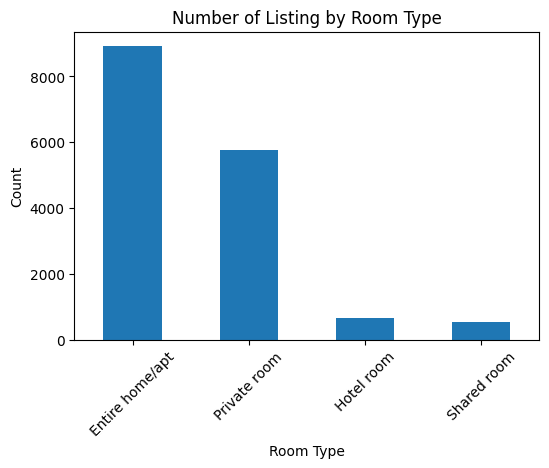

In [57]:
# Showing the total number for each columns 
Jumlahkamar = df['room_type'].value_counts()
df['room_type'].value_counts().plot(kind='bar',figsize=(6,4))
print(Jumlahkamar)
plt.title("Number of Listing by Room Type")
plt.xlabel("Room Type")
plt.xticks(rotation = 45)
plt.ylabel("Count")
plt.show()


Based on data above most of the listing in Airbnb are 
1. Entire Home/APT = 8912 rooms 
2. Private room = 5770 rooms
3. Hotel Room = 649
4. Shared room = 523
From the data above we can say the listing have significant number of entire home/APT type followed by private room type. Our main focus will be on these two type of listing.

## Data Analyst: Entire Home 
From the given data, we will answer below question below:
1.  What are the highest price for the Entire home/apt room type and average price for each neighbourhood?
2.  Which neighbourhood has the most listings for the Entire home/apt room type?
3.  Are there any significant (or major) owners for the Entire home/apt room type?
4.  What is the average minimum availability for the Entire home/apt room type?
   

In [58]:
#  What are the highest price for the Entire home/apt room type?
df_eh = df[df['room_type']== "Entire home/apt"]
df_eh_high = df_eh.sort_values('price',ascending=False).head(5)
df_eh_high[['room_type','name','host_name','neighbourhood','price']]

,room_type,name,host_name,neighbourhood,price
12868,Entire home/apt,New 1 bedroom apartment BTS MRT Asoke,Lucio,Vadhana,1100000
12300,Entire home/apt,3B中文No Guest Service Fee@Nana Asok/Soi11 Nightlife,Jj,Vadhana,1014758
9345,Entire home/apt,1BR cozy condo close to ONNUT BTS.,Cora,Khlong Toei,1000000
6289,Entire home/apt,BTS轻轨线on nut站，全新一房一厅，临Tesco商场市集!New cozy 1BR,Cora,Khlong Toei,1000000
1239,Entire home/apt,"Modern,wifi,5m MRT&2 Shopping Mall",Yasmine,Huai Khwang,1000000


Firstly, we will explain the entire home/apt type. The highest listing price is for "New 1 Bedroom Apartment BTS MRT Asoke" in the Vadhana neighborhood, owned by Lucio, with a price of 1,100,000. The other four listings come from Vadhana, Khlong Toei, and Huai Khwang. Based on the median, the top five highest-priced entire home listings are significantly above the median price, which is only 1,536.

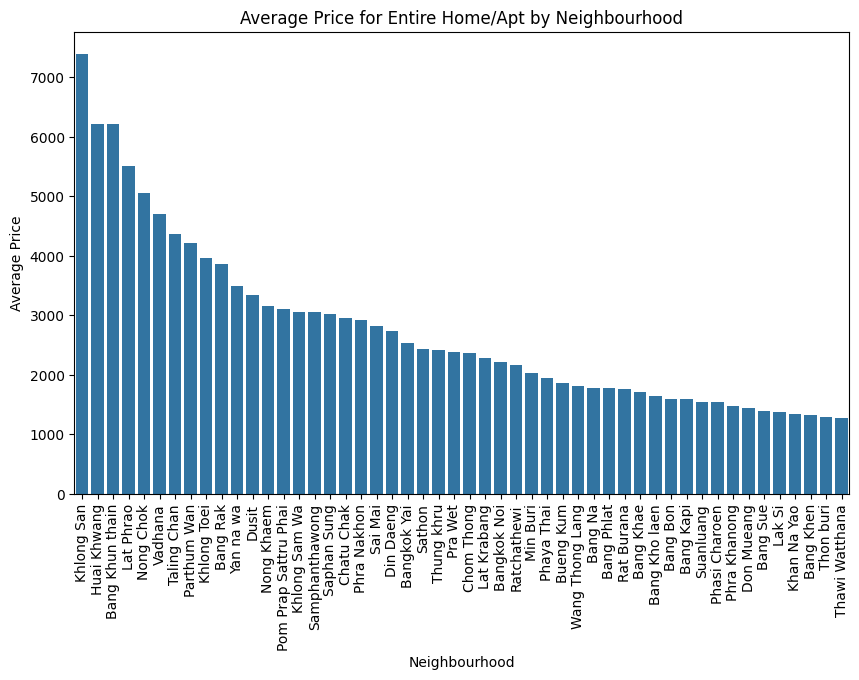

,neighbourhood,price
0,Khlong San,"7,395.77"
1,Huai Khwang,"6,222.61"
2,Bang Khun thain,"6,210.71"
3,Lat Phrao,"5,510.42"
4,Nong Chok,"5,054.50"


In [59]:
# What are the average price for each neighbourhood ?
df_entire = df[df["room_type"]=="Entire home/apt"]
avg_price = df_entire.groupby("neighbourhood")["price"].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=avg_price, x="neighbourhood", y="price", order=avg_price["neighbourhood"])
plt.title("Average Price for Entire Home/Apt by Neighbourhood")
plt.xticks(rotation=90)
plt.ylabel("Average Price")
plt.xlabel("Neighbourhood")
plt.show()
display(avg_price.head(5))

From the graph and bar plot, we can see the five neighborhoods with the highest average prices for the entire home/apt type. These are Khlong San, Huai Khwang, Bang Khun Thian, Lat Phrao, and Nong Chok. The average prices range from 5,045 to 7,395. Although the most expensive individual listings are in Khlong Tei and Vadhana, these neighborhoods do not appear in the list of the top five highest average prices.

In [60]:
# Which neighbourhood and listing has the most number for the Entire home/apt room type?
eh_stats = df_eh.groupby("neighbourhood").agg(
        total_listing =("id","count")).reset_index().sort_values("total_listing", ascending=False)
eh_stats.index = range(1,len(eh_stats)+1)

eh_name = df_eh['name'].value_counts().reset_index()
eh_name.columns = ['name','count']
eh_name = eh_name.sort_values(by= 'count', ascending=False)
pd.set_option('display.max_colwidth',None)
eh_name.index = range(1, len(eh_name)+1)
display(eh_stats.head(5),eh_name.head(5))

,neighbourhood,total_listing
1,Khlong Toei,1520
2,Vadhana,1451
3,Huai Khwang,776
4,Ratchathewi,656
5,Sathon,557


,name,count
1,New! La Chada Night Market studio 2PPL near MRT,45
2,30days! AirportLink Sukhumvit NANA MaxValu 2BR(4P),35
3,New! La Chada Night Market 1BR 2PPL near MRT,35
4,New! Gateway/ Bangkok University 1BR 2PPL near BTS,29
5,30days! Sukhumvit NANA spacious 1BR 2PPL near BTS,25


Based on neighborhoods for the entire home/apt type, Khlong Toei, Vadhana, and Huai Khwang have the highest number of listings, with 1,520, 1,451, and 776 listings, respectively. On the other hand, some identical listing names also appear frequently; these names not only represent the individual listing but also indicate the type of property. The first and third most frequent listings have "MRT" in their names, the second has access to the Airport Link, and the fourth and fifth have access to the BTS. There is a common theme of convenient transportation access among these popular listings.

In [61]:
#Are there any significant (or major) owners for the Entire home/apt room type?
eh_name = df_eh['host_name'].value_counts().reset_index()
eh_name.columns = ['host_name','count']
eh_name = eh_name.sort_values(by= 'count', ascending=False)
eh_nameavg = eh_name['count'].mean()
eh_name.head(5)
display(eh_name.head(5))
print(f'The average for Entire Home/apt is {eh_nameavg}')


,host_name,count
0,Curry,228
1,Noons,99
2,K,74
3,Ed,56
4,Ludoping,54


The average for Entire Home/apt is 2.8991541964866623


Based on the above, there are also hosts with a higher number of listings compared to others, led by Curry, Noons, and K, with 228, 99, and 74 listings, respectively. While the average for host to own listings is only 2,8 

In [62]:
#What is the average minimum availability for the Entire home/apt room type?
eh_name = df_eh['availability_365'].value_counts().reset_index()
eh_name.columns = ['availability_365','count']
eh_name = eh_name.sort_values(by= 'count', ascending=False)
avg_availability = df['availability_365'].mean()
display(eh_name.head(5))
print(f'The average for Entire Home/apt is {avg_availability}')

,availability_365,count
0,365,741
1,0,508
2,364,229
3,358,164
4,361,149


The average for Entire Home/apt is 244.37864261385138


Based on the table above, the highest availability for listings in the entire home/apt type is 365 days, but there are also cases where the availability is 0, which means the owner does not make their listing available to customers on given data received.


## Data Analyst: Private Room

From the given data, we will answer below question below:
1.  What are the highest price for the Private Room type and average price for each neighbourhood?
2.  Which neighbourhood has the most listings for the Private Room room type?
3.  Are there any significant (or major) owners for the Private Room type?
4.  What is the average minimum availability for theP rivate Room type?
   

In [63]:
#  What are the highest price for the Private room type?
df_pr = df[df['room_type']== "Private room"]
df_pr_high = df_pr.sort_values('price',ascending=False).head(5)
df_pr_high[['room_type','name','host_name','neighbourhood','price']]

,room_type,name,host_name,neighbourhood,price
4373,Private room,rm 1 : cozy & comfy,Jeab,Bang Phlat,600700
11885,Private room,🎗𝘾𝙝𝙚𝙬𝙖𝙩𝙝𝙖𝙞 𝙍𝙖𝙢𝙠𝙝𝙖𝙢𝙝𝙖𝙚𝙣𝙜\nBy KhunGrape,Jiranuch,Bang Kapi,429443
12792,Private room,rm 6 : bright morning sunlight.,Jeab,Bang Phlat,400717
6549,Private room,"WH (container, Double bed, 2ppl -F)",Napawadee,Khlong Toei,372227
6760,Private room,"WH (Container style, twin bed, 2ppl, citycenter-A)",Napawadee,Khlong Toei,314899


Above are the most expensive private room types based on price. The highest price comes from the unit "rm 1 : cozy & comfy" hosted by Jeab in the Bang Phlat neighbourhood, with a price of 600,700. Among private room types, the most expensive ones are found in the Bang Phlat, Bang Kapi, and Khlong Toei neighbourhoods.

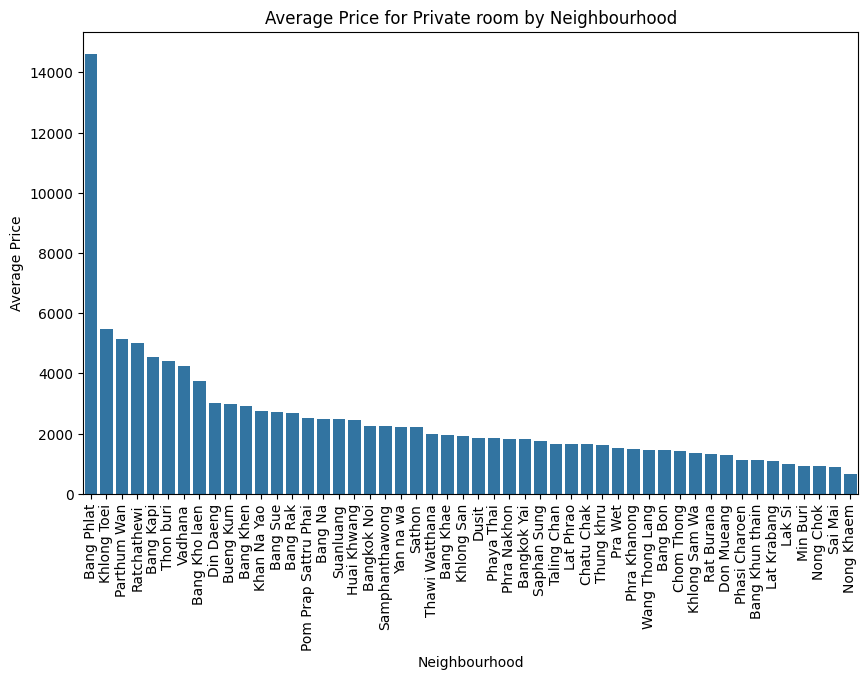

,neighbourhood,price
0,Bang Phlat,"14,616.89"
1,Khlong Toei,"5,481.06"
2,Parthum Wan,"5,154.56"
3,Ratchathewi,"5,018.97"
4,Bang Kapi,"4,558.23"


In [64]:
# What are the average price for each neighbourhood ?
df_pr_high = df[df["room_type"]=="Private room"]
avg_price = df_pr_high.groupby("neighbourhood")["price"].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=avg_price, x="neighbourhood", y="price", order=avg_price["neighbourhood"])
plt.title("Average Price for Private room by Neighbourhood")
plt.xticks(rotation=90)
plt.ylabel("Average Price")
plt.xlabel("Neighbourhood")
plt.show()
display(avg_price.head(5))

Above are the most expensive neighbourhoods based on average price. Bang Phlat, Khlong Toei, and Pathum Wan are the top three, which also align with the most expensive units in the table above, as four of them also come from these neighbourhoods.

In [65]:
# Which neighbourhood and listing has the most number for the Private room type?
pr_stats = df_pr.groupby("neighbourhood").agg(
        total_listing =("id","count")).reset_index().sort_values("total_listing", ascending=False)
pr_stats.index = range(1,len(pr_stats)+1)

pr_name = df_pr['name'].value_counts().reset_index()
pr_name.columns = ['name','count']
pr_name = pr_name.sort_values(by= 'count', ascending=False)
pd.set_option('display.max_colwidth',None)
pr_name.index = range(1, len(pr_name)+1)
display(pr_stats.head(5),pr_name.head(5))

,neighbourhood,total_listing
1,Vadhana,544
2,Khlong Toei,489
3,Bang Rak,375
4,Phra Nakhon,355
5,Ratchathewi,327


,name,count
1,Daneehostel,8
2,Shanti Lodge. Art House. Traditional Room,8
3,TEST & GO PKG - COVID-19 testing RT-PCR by 12 HRs.,7
4,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,7
5,Ladprao Studio - 32 sqm,6


The most listings come from Vardhana, Khlong Toei, and Bang Rak. This also aligns with the most expensive places and the highest average-priced neighbourhoods. The host names also do not appear to share identical keywords with the entire home/apt type. In this case, Daneehostel has the highest number of appearances, with 8 listings.

In [66]:
#Are there any significant (or major) owners for the private room type?
pr_name = df_pr['host_name'].value_counts().reset_index()
pr_name.columns = ['host_name','count']
pr_name = pr_name.sort_values(by= 'count', ascending=False)
pr_nameavg = pr_name['count'].mean()
pr_name.head(5)
display(pr_name.head(5))
print(f'The average for Private room  is {pr_nameavg}')


,host_name,count
0,Zuzu,49
1,ISanook Hotel,45
2,Kiattisak,37
3,Kim,37
4,Taosiam,28


The average for Private room  is 2.122884473877851


The highest host number own listing in the neighbourhood led by zuzu, Isanook Hotel and Kiatisak with 49, 45, and 37 respectively, with the average own of 2,12

In [67]:
#What is the average minimum availability for the private room type?
pr_name = df_pr['availability_365'].value_counts().reset_index()
pr_name.columns = ['availability_365','count']
pr_name = pr_name.sort_values(by= 'count', ascending=False)
avg_availability = df['availability_365'].mean()
display(pr_name.head(5))
print(f'The average for Private Room is {avg_availability}')

,availability_365,count
0,365,1394
1,364,343
2,0,251
3,180,238
4,90,158


The average for Private Room is 244.37864261385138


Based on the table above, the highest availability for listings in the entire home/apt type is 365 days, but there are also cases where the availability is 0, which means the owner does not make their listing available to customers on given data received.


Which is type room has the most number of reviews 

stat value:  0.04441873710284405
pvalue:  1.4396800095947462e-127
based on the result price are not normally distributed, we are going to use Manwhitneyu approach to do the analysis 


t-statistic: 30317205.5
p-value: 1.4396800095947462e-127
 There are significant difference between those group
There is a statistically significant price gap between entire homes and private rooms, confirming that entire homes command a premium in the market compared to private rooms. 


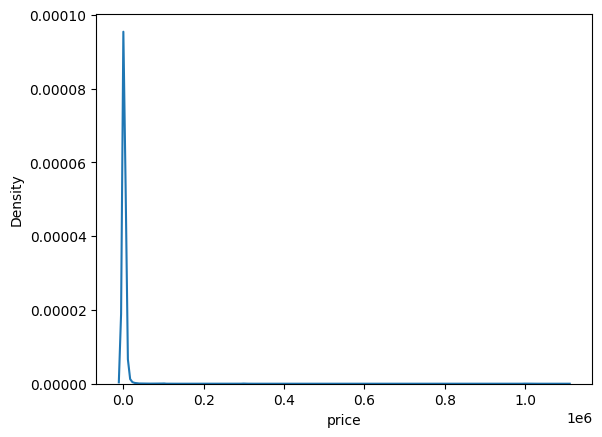

In [68]:
#Explore siginificant difference between entire home/apt and private room type 
sns.kdeplot(data=df, x='price') 
stat, pvalue = shapiro(df['price'])
print('stat value: ',stat)
print('pvalue: ',pvalue) 
print(f'based on the result price are not normally distributed, we are going to use Manwhitneyu approach to do the analysis ')
df_hh_price = df_eh['price']
df_sr_price = df_pr['price']
stat1, pvalue1 = mannwhitneyu(df_hh_price,df_sr_price)
print('\n')
print("t-statistic:", stat1)
print("p-value:", pvalue)
if pvalue1 > 0.05:
    print(" There are no significant difference between those group")
else:
    print(" There are significant difference between those group")
print(f'There is a statistically significant price gap between entire homes and private rooms, confirming that entire homes command a premium in the market compared to private rooms. ')


## Data Analyst: Hotel Room

From the given data, we will answer below question below:
1.  What are the highest price for the Hotel Room type and average price for each neighbourhood?
2.  Which neighbourhood has the most listings for the Hotel Room room type?
3.  Are there any significant (or major) owners for the Hotel Room type?
4.  What is the average minimum availability for the Shared Room type?
   

In [69]:
#  What are the highest price for the Hotel room type?
df_hh = df[df['room_type']== "Hotel room"]
df_hh_high = df_hh.sort_values('price',ascending=False).head(5)
df_hh_high[['room_type','name','host_name','neighbourhood','price']]

,room_type,name,host_name,neighbourhood,price
2668,Hotel room,Nice Check-in My Hostel (Private 2 beds),Nuttawut,Ratchathewi,300000
3415,Hotel room,Stylish 2 Bedroom Apartment in Ekkamai,Kasamsan,Vadhana,24390
6281,Hotel room,European Design In The City Near Shopping Mall,Patawan,Vadhana,23671
6283,Hotel room,One Bed In The City of Sukhumvit Near SkyTrain,Patawan,Vadhana,23629
6282,Hotel room,Bedroom In Town Central of Sukhumvit Near BTS,Patawan,Vadhana,23029


Above are the most expensive hotel room types based on price. The highest price comes from the unit “Nice Check-in My Hostel (Private 2 beds)” hosted by Nuttawut in the Ratchathewi neighbourhood, with a price of 300,000. Among hotel room types, the most expensive ones are found in the Vadhana and Ratchathewi neighbourhoods, with notable listings hosted by Kasamsan and Patawan.

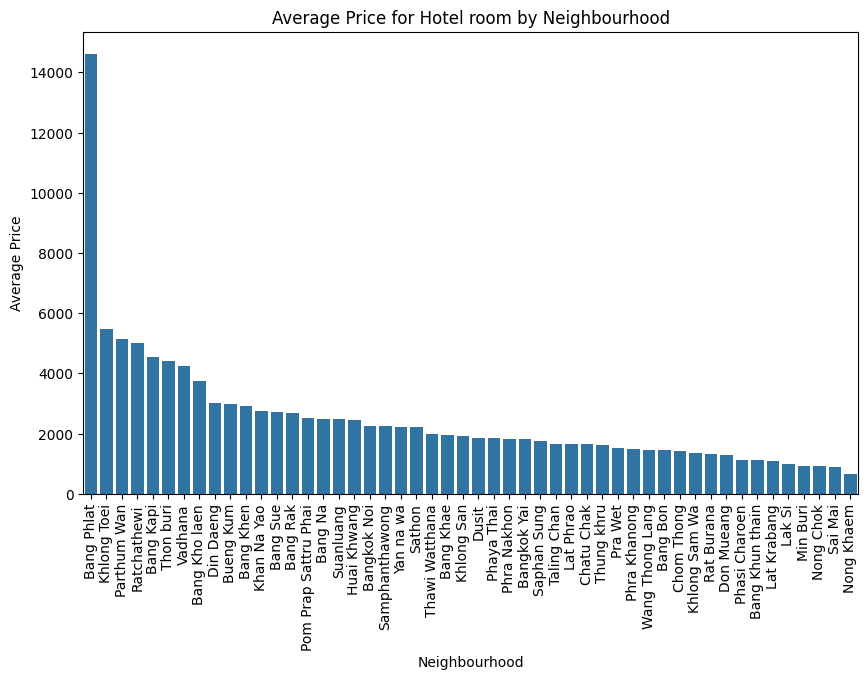

,neighbourhood,price
0,Bang Phlat,"14,616.89"
1,Khlong Toei,"5,481.06"
2,Parthum Wan,"5,154.56"
3,Ratchathewi,"5,018.97"
4,Bang Kapi,"4,558.23"


In [70]:
# What are the average price for each neighbourhood ?
df_hh_high = df[df["room_type"]=="Hotel room"]
avg_hhice = df_hh_high.groupby("neighbourhood")["price"].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=avg_price, x="neighbourhood", y="price", order=avg_price["neighbourhood"])
plt.title("Average Price for Hotel room by Neighbourhood")
plt.xticks(rotation=90)
plt.ylabel("Average Price")
plt.xlabel("Neighbourhood")
plt.show()
display(avg_price.head(5))

Based on the data above, Bang Kho Laem, Yan Nawa, and Ratchathewi are the most expensive by average price, at 7,765, 7,183, and 6,317 respectively. Even though four units from the Vadhana neighbourhood are among the top five most expensive individual units, Vadhana does not appear on the list of the top five by average price.

In [71]:
# Which neighbourhood and listing has the most number for the hotel room type?
hh_stats = df_hh.groupby("neighbourhood").agg(
        total_listing =("id","count")).reset_index().sort_values("total_listing", ascending=False)
hh_stats.index = range(1,len(hh_stats)+1)
hh_name = df_hh['name'].value_counts().reset_index()
hh_name.columns = ['name','count']
hh_name = hh_name.sort_values(by= 'count', ascending=False)
pd.set_option('display.max_colwidth',None)
hh_name.index = range(1, len(hh_name)+1)
display(hh_stats.head(5),hh_name.head(5))

,neighbourhood,total_listing
1,Vadhana,105
2,Phra Nakhon,77
3,Khlong Toei,73
4,Ratchathewi,70
5,Bang Rak,67


,name,count
1,White House Hostel Double Room Shared Bathroom,5
2,"Studio with Zen garden view (30sqm), LUXX Silom",4
3,White House Hostel Twin Room Shared Bathroom,4
4,White House Hostel 2 Bunk Beds Shared Bathroom,4
5,"1 bedroom with Zen garden view (44sqm), LUXX Silom",3


The most listings come from Vadhana, Phra Nakhon, and Khlong Toei, with 105, 77, and 73 listings respectively. This also aligns with neighbourhoods that appear frequently in the higher-priced categories. In terms of listing names, White House Hostel units dominate the table, with multiple room types appearing—such as Double Room Shared Bathroom (5 times) and Twin Room Shared Bathroom (4 times). Other notable frequent names include LUXX Silom with its Zen garden view units.

In [72]:
#Are there any significant (or major) owners for the hotel room type?
hh_name = df_hh['host_name'].value_counts().reset_index()
hh_name.columns = ['host_name','count']
hh_name = hh_name.sort_values(by= 'count', ascending=False)
hh_nameavg = hh_name['count'].mean()
hh_name.head(5)
display(hh_name.head(5))
print(f'The average for hotel room  is {pr_nameavg}')


,host_name,count
0,Dusadee,35
1,Lek Boonsiri,32
2,Sasi,18
3,Piti,18
4,K,15


The average for hotel room  is 2.122884473877851


The hosts with the highest number of hotel room listings are led by Dusadee with 35, followed by Lek Boonsiri with 32. Sasi and Piti each hold 18 listings, while host K has 15. On average, the number of hotel room listings per host is approximately 2.12.

In [73]:
#What is the average minimum availability for the hotel room type?
hh_name = df_hh['availability_365'].value_counts().reset_index()
hh_name.columns = ['availability_365','count']
hh_name = hh_name.sort_values(by= 'count', ascending=False)
avg_availability = df['availability_365'].mean()
display(hh_name.head(5))
print(f'The average for hotel Room is {avg_availability}')

,availability_365,count
0,365,106
1,0,82
2,364,47
3,361,22
4,358,16


The average for hotel Room is 244.37864261385138


For hotel rooms, availability varies widely. A total of 106 listings are available all year (365 days), while 82 listings have zero availability. Other notable counts include 47 listings available 364 days, 22 listings for 361 days, and 16 listings for 358 days. On average, hotel rooms are available for approximately 244 days per year.

## Data Analyst: Shared Room 

From the given data, we will answer below question below:
1.  What are the highest price for the Shared Room type and average price for each neighbourhood?
2.  Which neighbourhood has the most listings for the Shared Room room type?
3.  Are there any significant (or major) owners for the Shared Room type?
4.  What is the average minimum availability for the Shared Room type?
   

In [74]:
#  What are the highest price for the Shared room type?
df_sr = df[df['room_type']== "Shared room"]
df_sr_high = df_sr.sort_values('price',ascending=False).head(5)
df_sr_high[['room_type','name','host_name','neighbourhood','price']]

,room_type,name,host_name,neighbourhood,price
7857,Shared room,72+ ppl stay in siam hostel in middle of bangkok,SiamStadium,Parthum Wan,31200
6868,Shared room,Balcony with comfortable bay window,Zechariah,Ratchathewi,20895
2430,Shared room,"Pauls Inn ,A great riverside view 54 Sq/M cond",Shievaji,Phra Nakhon,17316
5577,Shared room,อพาร์ทเมนท์ Antioch,William,Bang Khun thain,13852
5079,Shared room,旅途中的家,Tianhao,Phra Khanong,13000


Above are the most expensive shared room types based on price. The highest-priced unit is “72+ ppl stay in Siam Hostel in middle of Bangkok” hosted by SiamStadium in the Pathum Wan neighbourhood, with a price of 31,200. Other notable expensive shared rooms include “Balcony with comfortable bay window” in Ratchathewi hosted by Zechariah (20,895), “Pauls Inn, A great riverside view 54 Sq/M cond” in Phra Nakhon hosted by Shievaji (17,316), “อพาร์ทเมนท์ Antioch” in Bang Khun Thain hosted by William (13,852), and “旅途中的家” in Phra Khanong hosted by Tianhao (13,000). Among shared room types, the most expensive listings are concentrated in Pathum Wan, Ratchathewi, and Phra Nakhon neighbourhoods.

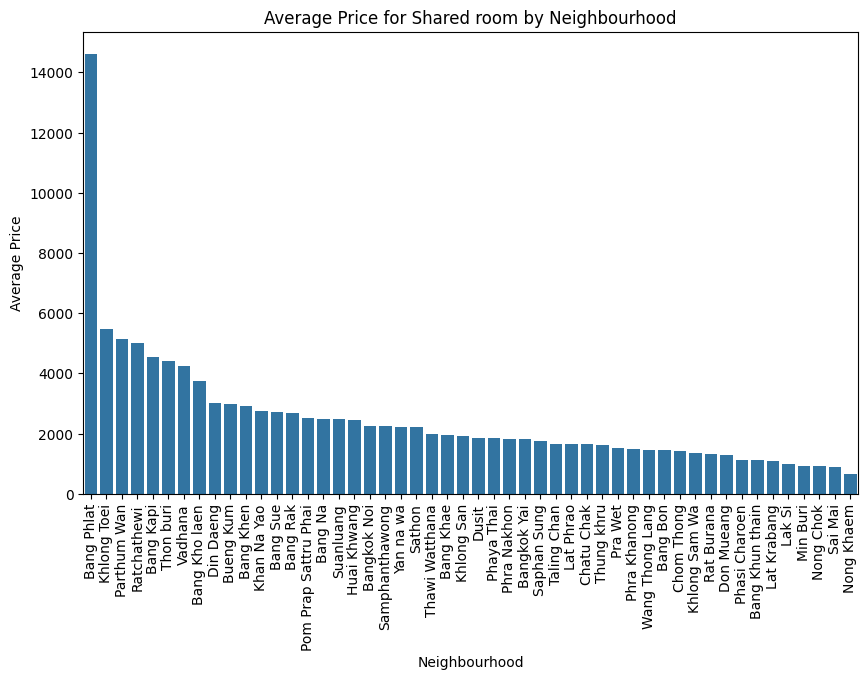

,neighbourhood,price
0,Bang Phlat,"14,616.89"
1,Khlong Toei,"5,481.06"
2,Parthum Wan,"5,154.56"
3,Ratchathewi,"5,018.97"
4,Bang Kapi,"4,558.23"


In [75]:
# What are the average price for each neighbourhood ?
df_sr_high = df[df["room_type"]=="Shared room"]
avg_srice = df_sr_high.groupby("neighbourhood")["price"].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=avg_price, x="neighbourhood", y="price", order=avg_price["neighbourhood"])
plt.title("Average Price for Shared room by Neighbourhood")
plt.xticks(rotation=90)
plt.ylabel("Average Price")
plt.xlabel("Neighbourhood")
plt.show()
display(avg_price.head(5))

Based on the data above, Bang Kho Laem, Yan Nawa, and Ratchathewi are the most expensive neighbourhoods by average price, at 7,765.00, 7,183.12, and 6,317.50 respectively. Other neighbourhoods with relatively high average prices include Chatuchak (4,944.50) and Samphanthawong (4,288.44).

In [76]:
# Which neighbourhood and listing has the most number for the shared room type?
sr_stats = df_sr.groupby("neighbourhood").agg(
        total_listing =("id","count")).reset_index().sort_values("total_listing", ascending=False)
sr_stats.index = range(1,len(sr_stats)+1)
sr_name = df_sr['name'].value_counts().reset_index()
sr_name.columns = ['name','count']
sr_name = sr_name.sort_values(by= 'count', ascending=False)
pd.set_option('display.max_colwidth',None)
sr_name.index = range(1, len(sr_name)+1)
display(sr_stats.head(5),sr_name.head(5))

,neighbourhood,total_listing
1,Phra Nakhon,131
2,Ratchathewi,61
3,Vadhana,53
4,Bang Rak,34
5,Huai Khwang,23


,name,count
1,14 Male Dormitory Room,14
2,14 Lady Dormitory Room,12
3,Shanti Lodge: Art House AC Dorm,8
4,8 Lady Dormitory Room,6
5,10 Mix Dormitory Room,6


The most listings come from Phra Nakhon, Ratchathewi, and Vadhana, with 131, 61, and 53 listings respectively. This also aligns with areas that frequently appear among higher-priced listings. In terms of listing names, dormitory-style rooms dominate, with 14 Male Dormitory Room appearing 14 times, 14 Lady Dormitory Room 12 times, and Shanti Lodge: Art House AC Dorm 8 times. Other frequent listings include 8 Lady Dormitory Room and 10 Mix Dormitory Room, each appearing 6 times

In [77]:
#Are there any significant (or major) owners for the shared room type?
sr_name = df_sr['host_name'].value_counts().reset_index()
sr_name.columns = ['host_name','count']
sr_name = sr_name.sort_values(by= 'count', ascending=False)
sr_nameavg = sr_name['count'].mean()
sr_name.head(5)
display(sr_name.head(5))
print(f'The average for shared room  is {pr_nameavg}')


,host_name,count
0,Pornchai,62
1,Wans,19
2,Off,15
3,Rachan,13
4,Thanet,12


The average for shared room  is 2.122884473877851


The hosts with the highest number of shared room listings are led by Pornchai with 62 listings, followed by Wans with 19, Off with 15, Rachan with 13, and Thanet with 12. On average, each host has approximately 2.12 shared room listings.

In [78]:
#What is the average minimum availability for the shared room type?
sr_name = df_sr['availability_365'].value_counts().reset_index()
sr_name.columns = ['availability_365','count']
sr_name = sr_name.sort_values(by= 'count', ascending=False)
avg_availability = df['availability_365'].mean()
display(sr_name.head(5))
print(f'The average for Shared Room is {avg_availability}')

,availability_365,count
0,365,151
1,364,55
2,180,47
3,90,46
4,179,21


The average for Shared Room is 244.37864261385138


For shared rooms, availability varies considerably. A total of 151 listings are available all year (365 days), while 55 listings are available 364 days. Other notable counts include 47 listings available 180 days, 46 listings available 90 days, and 21 listings available 179 days. On average, shared rooms are available for approximately 244 days per year.

# Summary

Summary 
1. Price for entire home/apt and private rooms have high outlier (over 1 million and 600 thousand), far above their median or average showing price dispersion. We also going to invetigate if the price room and entire home/type has siginificant difference in price term, will be explained below.
2. Expensive individual listings are often in Vandhana and Khlong Toei, but the higher averaged-price neighbourhoods differ (Khlong San, Bang Kho Laem, Yan Nawa).
3. Transport Acess: for Entire home/apt type access to the transportation are in their top listing 
4. Host: There are siginifcant host that has huge listing for every room type. Hosts with multiple listings play a significant role in supply, especially in Vadhana, Khlong Toei, and Phra Nakhon.


   

# Strategy 

Strategy that will be implemented based on the finding and analysis:
1. Strategy 1: Focus on Popular listing and Place: Focus on High-Demand Neighborhoods
    Prioritize properties in Khlong Toei, Vadhana, Huai Khwang, Bang Phlat, and Ratchathewi—these have many listings and high average prices.
    Easier access could become advantage, to MRT, BTS, or Airport Link to attract more guests.

2. Strategy 2: Host Collaboration 
   Host Domination:
   Make collaboration with Curry with 228, Pornchai with 62.
   Make partnership with these high volume host, secured a supply in the listing 
   For small host: differentiate through unique places, authentic experiences, or niche market (like pet friendly or ecostays)
   
   

3. Strategy 3: Host Education 
   Communicate to hosts the opportunity cost of setting availability to zero.
   Make a Training webinars or dashboards showing estimate revenue could be loss.
   Encourage hosts to use seasonal availability instead of all-or-nothing.
   
   